# Conexión a Azure Quantum y envío del trabajo

Suponemos que ya hemos realizado todos los pasos para usar AzureQPU:

    - Crear una cuenta en Azure
    - Suscribir un programa gratuito o de pago
    - Crear un servicio de Azure Quantum creando previamente un espacio de trabajo. 

Hecho esto ya solo tendría que establecer la conexión mediante mi identificador de recurso y localización de ejecución. 

    - MyResourceID
    - MyLocation


**Nota:** En el documento CREACIÓN DE CUENTA AZURE QUANTUM se explica cómo crear un área de trabajo:

https://mega.nz/file/MiMlCKJA#l1VMMoEwtq3UHLlgiCJiu4nSMEgS31V_cw0zY2tJobQ

## Instalación del Azure Quantum Developer Kit 


Podemos instalar el QDK de Azure Quantum en Python para Q#, Qiskit, Cirq:

https://learn.microsoft.com/es-es/azure/quantum/install-overview-qdk

Para Qiskit:

%pip install qsharp azure-quantum[qiskit]    

In [ ]:
%pip install qsharp azure-quantum[qiskit] 

In [ ]:
%pip install pylatexenc

## Envío de un programa Qiskit a Azure Quantum

https://learn.microsoft.com/es-es/azure/quantum/quickstart-microsoft-qiskit?tabs=tabid-ionq&pivots=platform-local

In [1]:
import qiskit
import azure.quantum
from azure.quantum import Workspace 
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from azure.quantum.qiskit import AzureQuantumProvider

In [ ]:
# Genero un objeto workspace con el resource_id y location de mi espacio de trabajo en Azure Quantum
workspace = Workspace(  
    resource_id = "/subscriptions/0f4027d3-276d-4941-ad53-a9244c367728/resourceGroups/imardiegoAzureQuantumResourcesGroup/providers/Microsoft.Quantum/Workspaces/imardiegoAzureQuantumWorkArea",
    location = "westeurope"
    )

# Genero un objeto provider en función de los datos de mi workspace
provider = AzureQuantumProvider(workspace)

Codificamos un circuito simple

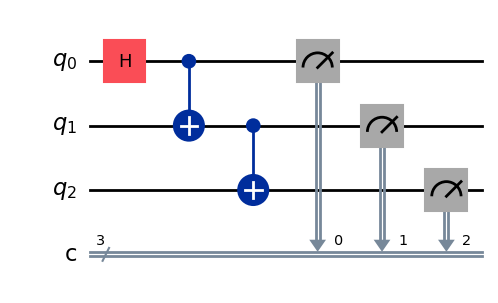

In [ ]:
# Declaro un circuito de tres qubits entrelazados
circuit = QuantumCircuit(3, 3)
circuit.name = "Qiskit Sample - 3-qubit GHZ circuit"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

# Print out the circuit
circuit.draw('mpl')

In [ ]:
# Obtenemos la información de nuestro workspace en cuanto a que QPU están disponibles:
MyTargets = workspace.get_targets()
print("This workspace's targets:")
MyTargets

gio: https://login.microsoftonline.com/235bdb0d-7ee9-4049-ae95-0f2fb6253595/oauth2/v2.0/authorize?client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8400&scope=https%3A%2F%2Fquantum.microsoft.com%2F.default+offline_access+openid+profile&state=SUsZgLqTwlFWtbAB&code_challenge=BtGnqltG0NhNUB9-_5bf23G4XNN9VK670Ym7LLhPF50&code_challenge_method=S256&nonce=dab945597f930310759077d16e611982a5c18a32f82962dfab143f1266f54957&client_info=1&prompt=select_account: Operation not supported


This workspace's targets:


[<Target name="quantinuum.sim.h1-1sc", avg. queue time=9 s, TargetAvailability.AVAILABLE>,
 <Target name="quantinuum.sim.h1-1e", avg. queue time=0 s, TargetAvailability.AVAILABLE>,
 <Target name="rigetti.sim.qvm", avg. queue time=5 s, TargetAvailability.AVAILABLE>]

In [5]:
# Selecciono el tercer elemento de la lista de targets: rigetti.sim.qvm
MyTarget = MyTargets[2]
MyTarget.name

'rigetti.sim.qvm'

gio: https://login.microsoftonline.com/235bdb0d-7ee9-4049-ae95-0f2fb6253595/oauth2/v2.0/authorize?client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8400&scope=https%3A%2F%2Fquantum.microsoft.com%2F.default+offline_access+openid+profile&state=uOXqWbgmhiFjrNHc&code_challenge=lDIcJ53hH9k5lOUOC_MatNuwvsOtk7CZoyfgU3Grguw&code_challenge_method=S256&nonce=b35493c14641e027a333c57dd9534c0bbc4c5eaa6fc68e5797bf10faa6010236&client_info=1&prompt=select_account: Operation not supported


4fe55ac0-90cd-11f0-be7d-00155d08dbcf
..........{'000': 56, '111': 44}


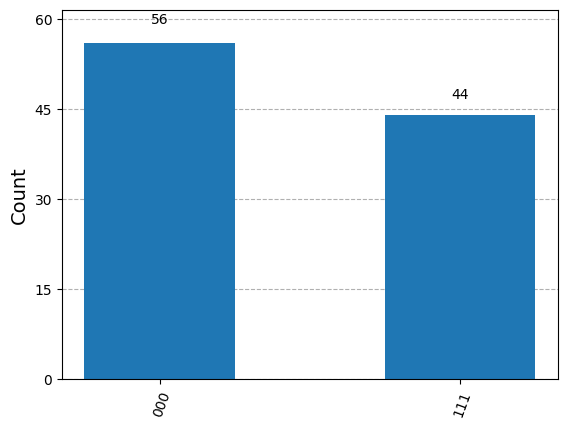

In [ ]:
# Obtengo un objeto backend en función de los datos de mi target elegido
backend = provider.get_backend(MyTarget.name)

# Transpilamos el circuito para que sea compatible con el backend seleccionado
circuit = transpile(circuit, backend)

# Ejecuto el circuito en el backend seleccionado
job = backend.run(circuit, shots=100)

# Imprimo el id del trabajo enviado
job_id = job.id()
print(job_id)

# Obtengo los resultados del trabajo enviado
result = job.result()

# Mediante get_counts() obtenemos las cuentas de cada resultado
counts = result.get_counts(circuit)
print(counts)

# Visualizamos los resultados
plot_histogram(counts)

# hacer clic en la url para poder acceder a azure quantum


### Ejecutamos con un simulador Qsharp

Un ejemplo de código en Qiskit para generar un circuito aleatorio y ejecutarlo en un simulador de Q# sería el siguiente:

In [ ]:

from qiskit.circuit.random import random_circuit
from qsharp.interop.qiskit import QSharpBackend

#QSharpBackend es un backend de Qiskit que 
# permite ejecutar circuitos de Qiskit simulados
# usando el simulador de quantum de Q#.

# Defino un circuito aleatorio de dos qubits con dos puertas
circuit = random_circuit(2, 2, measure=True)
print(circuit)

# Obtenemos un objeto backend en función de los datos de mi target seleccionado
# que es un simulador de Q#, lo ejecuto y obtengo los resultados y los cuento.
backend = QSharpBackend()
job = backend.run(circuit)
counts = job.result().get_counts()

# Gráfico en forma de texto del circuito
print(counts)

                           ┌─────┐┌─┐   
q_0: ──────────────────────┤ Sdg ├┤M├───
     ┌────────────────────┐└──┬──┘└╥┘┌─┐
q_1: ┤ U2(0.68733,4.4042) ├───■────╫─┤M├
     └────────────────────┘        ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1 
{'00': 525, '10': 499}


## Otro ejemplo enviado a  Azure

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from azure.quantum import Workspace 
from azure.quantum.qiskit import AzureQuantumProvider

In [2]:
#--- 1. Definir el circuito Bell ---

BellJob = QuantumCircuit(2, 2, name="BellJob")
BellJob.h(0)
BellJob.cx(0, 1)
BellJob.measure([0,1], [0,1])

# --- 2. Conectarse al workspace de Azure Quantum ---
# Sustituyo estos valores por los de mi workspace

workspace = Workspace(  
    resource_id = "/subscriptions/0f4027d3-276d-4941-ad53-a9244c367728/resourceGroups/imardiegoAzureQuantumResourcesGroup/providers/Microsoft.Quantum/Workspaces/imardiegoAzureQuantumWorkArea",
    location = "westeurope"
    )

# Generamos un objeto provider en función de los datos de mi workspace
provider = AzureQuantumProvider(workspace)

#--- 3. Elegir un backend ---
# Ejemplo con simulador (puede ser "microsoft.estimator" o hardware de un partner como IonQ, Quantinuum, Rigetti...)

backend = provider.get_backend("rigetti.sim.qvm")

# --- 4. Ejecutar el job ---

job = backend.run(BellJob, shots=1000)

#--- 5. Esperar resultados ---

result = job.result()
print("Resultados de BellJob:", result.get_counts())

# Debo hacer clic en la url para poder acceder a azure quantum

gio: https://login.microsoftonline.com/235bdb0d-7ee9-4049-ae95-0f2fb6253595/oauth2/v2.0/authorize?client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8400&scope=https%3A%2F%2Fquantum.microsoft.com%2F.default+offline_access+openid+profile&state=OiFpXCesthfwcYNB&code_challenge=B2SaWOHaBLJULwtjZOuqQZkBj0Eu8A-zd10XhaM8kkQ&code_challenge_method=S256&nonce=1b4c7b81b622c8e1c5e32bf135c5830eeeadb8b2db2f1bf2839599b7238d91be&client_info=1&prompt=select_account: Operation not supported


.........Resultados de BellJob: {'00': 513, '11': 487}


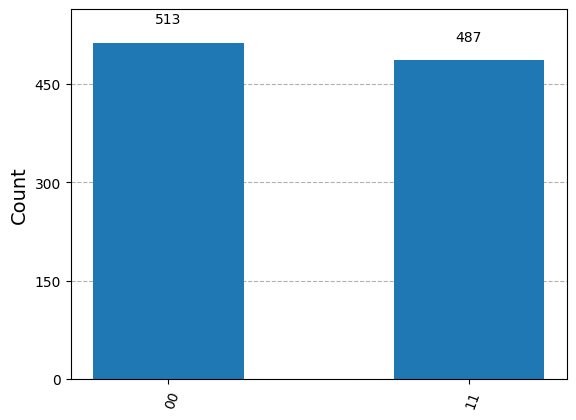

In [ ]:
# Histograma con los resultados
plot_histogram(result.get_counts())

### Otra forma de enviar la ejecución a Azure Quantum

Compilo previamente

In [1]:
from qiskit import QuantumCircuit, transpile
from azure.quantum import Workspace
from qiskit.visualization import plot_histogram
from azure.quantum.qiskit import AzureQuantumProvider

# Definir el Workspace (aquí sí van resource_id y location)
workspace = Workspace(
    resource_id = "/subscriptions/0f4027d3-276d-4941-ad53-a9244c367728/resourceGroups/imardiegoAzureQuantumResourcesGroup/providers/Microsoft.Quantum/Workspaces/imardiegoAzureQuantumWorkArea",
    location = "westeurope"
)

# Inicializar provider con workspace
provider = AzureQuantumProvider(workspace=workspace)

In [2]:
MyTargets = workspace.get_targets()
print("This workspace's targets:")
MyTargets

# Debo hacer clic en la url para poder acceder a azure quantum

gio: https://login.microsoftonline.com/235bdb0d-7ee9-4049-ae95-0f2fb6253595/oauth2/v2.0/authorize?client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8400&scope=https%3A%2F%2Fquantum.microsoft.com%2F.default+offline_access+openid+profile&state=SgqpByDJjxlnbwLm&code_challenge=Il0Edob9cHtuqEhpBPpcJvaxY_59GS-NY93aJM2gzGw&code_challenge_method=S256&nonce=91e09ce0f371dc47d2cc78060e6b34a89ede302e822c9b23b17e94023b8fd5c2&client_info=1&prompt=select_account: Operation not supported


This workspace's targets:


[<Target name="quantinuum.sim.h1-1sc", avg. queue time=9 s, TargetAvailability.AVAILABLE>,
 <Target name="quantinuum.sim.h1-1e", avg. queue time=0 s, TargetAvailability.AVAILABLE>,
 <Target name="rigetti.sim.qvm", avg. queue time=5 s, TargetAvailability.AVAILABLE>]

In [3]:
qpu=MyTargets[2].name
qpu

'rigetti.sim.qvm'

In [4]:
backend = provider.get_backend(qpu)

In [5]:
# Declaro un circuito de dos qubits entrelazados
BellJob = QuantumCircuit(2, 2, name="BellJob2")
BellJob.h(0)
BellJob.cx(0, 1)
BellJob.measure([0,1], [0,1])


In [6]:
qc_compiled = transpile(BellJob, backend)

In [7]:
# Envío el trabajo a Azure Quantum
job = backend.run(qc_compiled, shots=100)
print("Job enviado. ID:", job.id())

# Obtengo los resultados y los imprimo
result = job.result()
print("Resultados:", result.get_counts())

Job enviado. ID: 90cb3d8a-918a-11f0-b9b7-00155dd4bea4
........Resultados: {'00': 54, '11': 46}


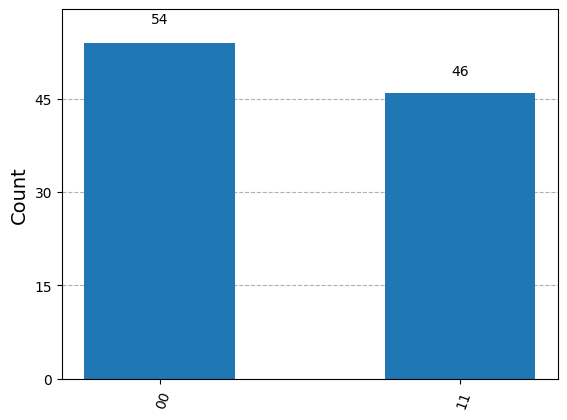

In [8]:
# Dibujo el histograma
plot_histogram(result.get_counts())

## Envío a Azure Quantum ejecutado con QASM y de QASM a Qiskit

A través de Cirq podemos convertir un circuito de Cirq a QASM y luego cargarlo en Qiskit para finalmente enviarlo a Azure Quantum.

In [1]:
from qiskit import QuantumCircuit, transpile
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.visualization import plot_histogram
import cirq

In [2]:
# --- 1. Circuito en Cirq ---
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    # Puerta Hadamard sobre q0 con **0.5 que es equivalente a √H
    cirq.X(q0)**0.5,             # √X
    cirq.CX(q0, q1),             # CNOT
    # Medimos ambos qubits y los etiquetamos con b.
    cirq.measure(q0, q1, key='b')
)

In [3]:
# --- 2. Exportamos el circuito a QASM ---
qasm_str = cirq.qasm(circuit)

In [4]:
# --- 3. De QASM lo importamos en Qiskit ---
qc = QuantumCircuit.from_qasm_str(qasm_str)

print("Circuito en Qiskit:")
print(qc)

Circuito en Qiskit:
       ┌────┐     ┌─┐   
  q_0: ┤ √X ├──■──┤M├───
       └────┘┌─┴─┐└╥┘┌─┐
  q_1: ──────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
m_b: 2/════════════╩══╩═
                   0  1 


In [5]:
# --- 4. Conectarse a Azure Quantum ---
# Definir el Workspace 
workspace = Workspace(
    resource_id = "/subscriptions/0f4027d3-276d-4941-ad53-a9244c367728/resourceGroups/imardiegoAzureQuantumResourcesGroup/providers/Microsoft.Quantum/Workspaces/imardiegoAzureQuantumWorkArea",
    location = "westeurope"
)
provider = AzureQuantumProvider(workspace=workspace)

In [6]:
# Ver lista de backends disponibles
for backend in provider.backends():
    print(backend.name())

gio: https://login.microsoftonline.com/235bdb0d-7ee9-4049-ae95-0f2fb6253595/oauth2/v2.0/authorize?client_id=04b07795-8ddb-461a-bbee-02f9e1bf7b46&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8400&scope=https%3A%2F%2Fquantum.microsoft.com%2F.default+offline_access+openid+profile&state=ImoRJvNdTaXcxCuw&code_challenge=2HkCuKIuQc5FRDhHkFquTdLgqWB4HQrOpaV2X7uPS74&code_challenge_method=S256&nonce=ecaf11412c4161429f412d4b4624da8bca09c9da75904ab10397d79e7667b085&client_info=1&prompt=select_account: Operation not supported


quantinuum.sim.h1-1sc
quantinuum.sim.h1-1e
rigetti.sim.qvm


In [7]:
# --- 5. Elegir backend (QPU) ---
backend = provider.get_backend("rigetti.sim.qvm")  # Ejemplo

In [8]:
# --- 6. Transpilar y enviar trabajo ---
# Transpile sirve para adaptar el circuito a la arquitectura del backend seleccionado
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=100)  # shots = número de ejecuciones

In [9]:
# --- 7. Obtener resultados ---
result = job.result()
print("Resultados:")
print(result.get_counts())

.

......Resultados:
{'00': 54, '11': 46}


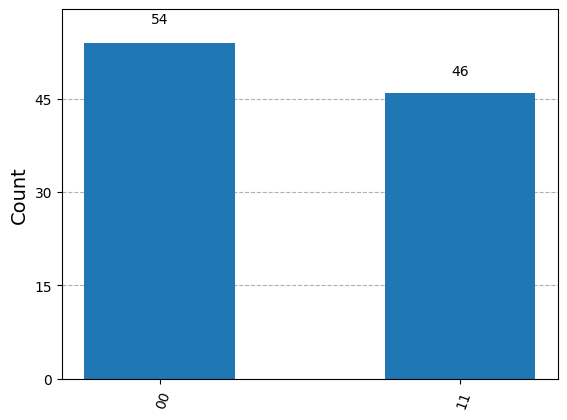

In [10]:
# Visualizar resultados
plot_histogram(result.get_counts())